In [1]:
import ROOT

import numpy as np
import matplotlib.pyplot as plt

n_sim = 1000000

# Biger fonts
plt.rcParams.update({'font.size': 14})

Welcome to JupyROOT 6.28/04


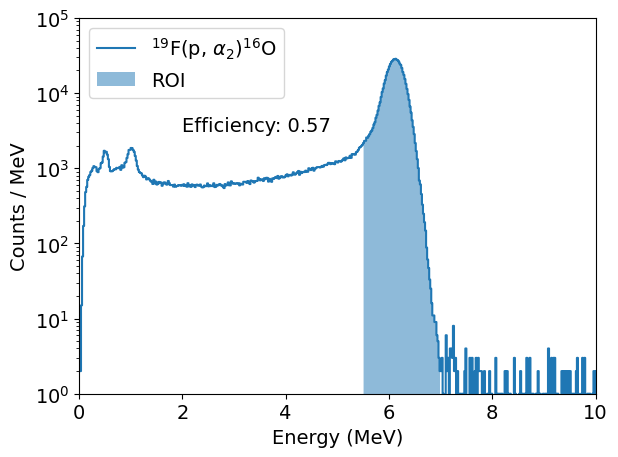

In [2]:
f = ROOT.TFile("histograms/19F_pa.root")

h1 = f.Get("BGOsum")

counts = h1.Integral( h1.FindBin(5500), h1.FindBin(7000) )
back = ( h1.Integral( h1.FindBin(7000), h1.FindBin(7100) ) / 100 + h1.Integral( h1.FindBin(5400), h1.FindBin(5500) ) / 100 ) * ( 7000 - 5500 ) / 2

efficiency = ( counts - back ) / n_sim

# Convert to numpy
bins, counts = [], []
for i in range(h1.GetNbinsX()):
    bins.append(h1.GetBinCenter(i))
    counts.append(h1.GetBinContent(i))

bins, counts = np.array(bins) / 1e3, np.array(counts)

# Rebin by 10
counts = np.sum(counts.reshape(-1, 10), axis=1)
bins = np.mean(bins.reshape(-1, 10), axis=1)


# Plot the histogram

fig, ax = plt.subplots()

ax.step(bins, counts, where='mid', label=r"$^{19}$F(p, $\alpha _{2}$)$^{16}$O")

# Fill around the integral
ax.fill_between(bins, 0, counts, where=(bins > 5.500) & (bins < 7.000), alpha=0.5, label="ROI")

# Plot the efficiency
plt.text(0.2, 0.7, f"Efficiency: {efficiency:.2f}", transform=ax.transAxes)

ax.set_xlabel("Energy (MeV)")
ax.set_ylabel("Counts / MeV")

ax.set_xlim(0, 10)
ax.set_ylim(bottom=1, top=1e5)

ax.set_yscale("log")

plt.legend()

plt.tight_layout()

plt.savefig("figures/19F_pa.png")
plt.show()

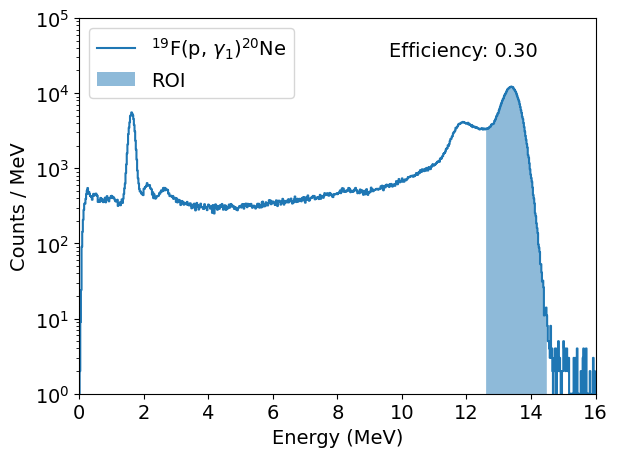

In [3]:
f = ROOT.TFile("histograms/19F_pg.root")

h1 = f.Get("BGOsum")

counts = h1.Integral( h1.FindBin(12600), h1.FindBin(14500) )
back = ( h1.Integral( h1.FindBin(12500), h1.FindBin(12600) ) / 100 + h1.Integral( h1.FindBin(14500), h1.FindBin(14600) ) / 100 ) * ( 14500 - 12600 ) / 2

efficiency = ( counts - back ) / n_sim

# Convert to numpy
bins, counts = [], []
for i in range(h1.GetNbinsX()):
    bins.append(h1.GetBinCenter(i))
    counts.append(h1.GetBinContent(i))

bins, counts = np.array(bins) / 1e3, np.array(counts)

counts = np.sum(counts.reshape(-1, 10), axis=1)
bins = np.mean(bins.reshape(-1, 10), axis=1)

# Plot the histogram

fig, ax = plt.subplots()

ax.step(bins, counts, where='mid', label=r"$^{19}$F(p, $\gamma _{1}$)$^{20}$Ne")

# Fill around the integral
ax.fill_between(bins, 0, counts, where=(bins > 12.600) & (bins < 14.500), alpha=0.5, label="ROI")

# Plot the efficiency
plt.text(0.6, 0.9, f"Efficiency: {efficiency:.2f}", transform=ax.transAxes)

ax.set_xlabel("Energy (MeV)")
ax.set_ylabel("Counts / MeV")

ax.set_xlim(0, 16)
ax.set_ylim(bottom=1, top=1e5)

ax.set_yscale("log")

plt.legend()

plt.tight_layout()

plt.savefig("figures/19F_pg.png")
plt.show()

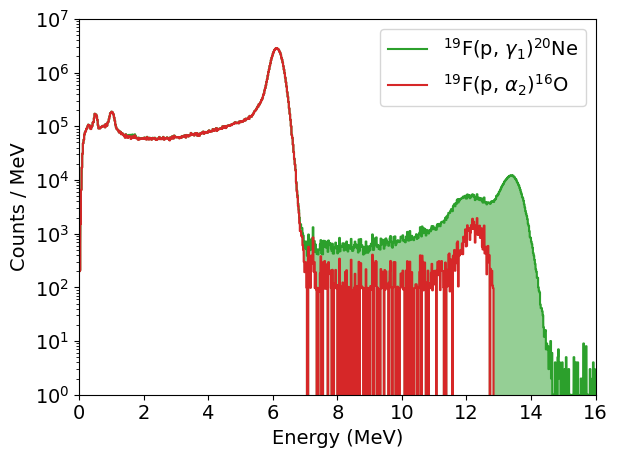

In [4]:
# Plot two histograms stacked with ratios

f = ROOT.TFile("histograms/19F_pa.root")

h1 = f.Get("BGOsum")

# Convert to numpy
bins1, counts1 = [], []
for i in range(h1.GetNbinsX()):
    bins1.append(h1.GetBinCenter(i))
    counts1.append(h1.GetBinContent(i))

f = ROOT.TFile("histograms/19F_pg.root")

h2 = f.Get("BGOsum")

# Convert to numpy
bins2, counts2 = [], []
for i in range(h2.GetNbinsX()):
    bins2.append(h2.GetBinCenter(i))
    counts2.append(h2.GetBinContent(i))

bins1, counts1 = np.array(bins1), np.array(counts1)
bins2, counts2 = np.array(bins2), np.array(counts2)

# Plot the histogram

fig, ax = plt.subplots()

ratio1 = 1e2
ratio2 = 1

# Sample the histograms
counts1 = np.random.poisson(counts1 * ratio1)
counts2 = np.random.poisson(counts2 * ratio2)

# Rebin by 10
counts1 = np.sum(counts1.reshape(-1, 10), axis=1)
counts2 = np.sum(counts2.reshape(-1, 10), axis=1)
bins1 = np.mean(bins1.reshape(-1, 10), axis=1) / 1e3
bins2 = np.mean(bins2.reshape(-1, 10), axis=1) / 1e3

# Create new

ax.step(bins2, counts2 + counts1, where='mid', label=r"$^{19}$F(p, $\gamma _{1}$)$^{20}$Ne", color='tab:green')
ax.step(bins1, counts1, where='mid', label=r"$^{19}$F(p, $\alpha _{2}$)$^{16}$O", color='tab:red')

# Fill around the stacked histogram
ax.fill_between(bins2, counts1, counts2 + counts1, alpha=0.5, color='tab:green')

ax.set_xlabel("Energy (MeV)")
ax.set_ylabel("Counts / MeV")

ax.set_xlim(0, 16)
ax.set_ylim(bottom=1, top=1e7)

ax.set_yscale("log")

plt.legend()

plt.tight_layout()

plt.savefig("figures/19F_pa_pg.png")
plt.show()

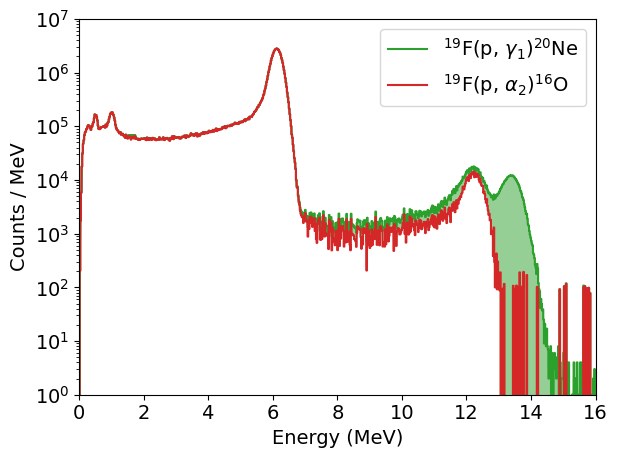

In [6]:
# Plot two histograms stacked with ratios

f = ROOT.TFile("histograms/19F_pa_pu0.01.root")

h1 = f.Get("BGOsum")

# Convert to numpy
bins1, counts1 = [], []
for i in range(h1.GetNbinsX()):
    bins1.append(h1.GetBinCenter(i))
    counts1.append(h1.GetBinContent(i))

f = ROOT.TFile("histograms/19F_pg.root")

h2 = f.Get("BGOsum")

# Convert to numpy
bins2, counts2 = [], []
for i in range(h2.GetNbinsX()):
    bins2.append(h2.GetBinCenter(i))
    counts2.append(h2.GetBinContent(i))

bins1, counts1 = np.array(bins1), np.array(counts1)
bins2, counts2 = np.array(bins2), np.array(counts2)

# Plot the histogram

fig, ax = plt.subplots()

ratio1 = 1e2
ratio2 = 1

# Sample the histograms
counts1 = np.random.poisson(counts1 * ratio1)
counts2 = np.random.poisson(counts2 * ratio2)

# Rebin by 10
counts1 = np.sum(counts1.reshape(-1, 10), axis=1)
counts2 = np.sum(counts2.reshape(-1, 10), axis=1)
bins1 = np.mean(bins1.reshape(-1, 10), axis=1) / 1e3
bins2 = np.mean(bins2.reshape(-1, 10), axis=1) / 1e3

# Create new

ax.step(bins2, counts2 + counts1, where='mid', label=r"$^{19}$F(p, $\gamma _{1}$)$^{20}$Ne", color='tab:green')
ax.step(bins1, counts1, where='mid', label=r"$^{19}$F(p, $\alpha _{2}$)$^{16}$O", color='tab:red')

# Fill around the stacked histogram
ax.fill_between(bins2, counts1, counts2 + counts1, alpha=0.5, color='tab:green')

ax.set_xlabel("Energy (MeV)")
ax.set_ylabel("Counts / MeV")

ax.set_xlim(0, 16)
ax.set_ylim(bottom=1, top=1e7)

ax.set_yscale("log")

plt.legend()

plt.tight_layout()

plt.savefig("figures/19F_pa_pg_pu0.01.png")
plt.show()